# **CSCE 5218 / CSCE 4930 Deep Learning**

# **HW1a The Perceptron** (20 pt)


In [19]:
# Get the datasets
!wget http://huang.eng.unt.edu/CSCE-5218/test.dat
!wget http://huang.eng.unt.edu/CSCE-5218/train.dat


--2022-02-07 05:47:45--  http://huang.eng.unt.edu/CSCE-5218/test.dat
Resolving huang.eng.unt.edu (huang.eng.unt.edu)... 129.120.123.155
Connecting to huang.eng.unt.edu (huang.eng.unt.edu)|129.120.123.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2844 (2.8K)
Saving to: ‘test.dat.3’

test.dat.3          100%[===================>]   2.78K  --.-KB/s    in 0s      

2022-02-07 05:47:45 (335 MB/s) - ‘test.dat.3’ saved [2844/2844]

--2022-02-07 05:47:46--  http://huang.eng.unt.edu/CSCE-5218/train.dat
Resolving huang.eng.unt.edu (huang.eng.unt.edu)... 129.120.123.155
Connecting to huang.eng.unt.edu (huang.eng.unt.edu)|129.120.123.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11244 (11K)
Saving to: ‘train.dat.3’

train.dat.3         100%[===================>]  10.98K  --.-KB/s    in 0s      

2022-02-07 05:47:46 (109 MB/s) - ‘train.dat.3’ saved [11244/11244]



In [20]:
# Take a peek at the datasets
!head train.dat
!head test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13
1	1	1	1	0	0	1	1	0	0	0	1	1	0
0	0	0	1	0	0	1	1	0	1	0	0	1	0
0	1	1	1	0	1	1	1	1	0	0	0	1	0
0	1	1	0	1	0	1	1	1	0	1	0	1	0
0	1	0	0	0	1	0	1	0	1	0	0	1	0
0	1	1	0	0	1	1	1	1	1	1	0	1	0
0	1	1	1	0	0	1	1	0	0	0	1	1	0
0	1	0	0	1	0	0	1	1	0	1	1	1	0
1	1	1	1	0	0	1	1	0	0	0	0	1	0


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this. 

In [21]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')
    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data



def dot_product(a, b):
    #TODO: Return dot product of array 1 and array 2
    val=0
    for a,b in zip(a, b):
      val = val+a*b
    return val


def sigmoid(x):
    #TODO: Return outpout of sigmoid function on x
    e=2.718
    return (1.0/(1.0+e**(-1.0*x)))

# The output of the model, which for the perceptron is 
# the sigmoid function applied to the dot product of 
# the instance and the weights
def output(weight, instance):
    #TODO: return the output of the model 
    return sigmoid(dot_product(weight, instance))

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    #TODO: return the prediction of the model
    if output(weights, instance) >= 0.5:
      return 1
    else:
      return 0


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate) 
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    #TODO: name this step
    weights = [0] * (len(instances[0])-1)
    

    for _ in range(epochs):
        for instance in instances:
            #TODO: name these steps
            in_value = dot_product(weights, instance) #calculates the dot product (Array Multiplication)
            output = sigmoid(in_value) #Calculates the given value is greater than or equal to 0.5 and return the result.
            error = instance[-1] - output #Calculates the error 
            #TODO: name these steps
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]

    return weights

## Run it

In [22]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)





->When checking the first and the second code part, we are using sigmoid activation function to update the weights. The Non- linearity method is used in Perceptron to learn more complex task.


### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above) 


In [23]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate]
for lr in lr_array:
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
      print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")
    print("-"*5)
    #print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; " f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
-----
#tr: 40, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
-----
#tr: 100, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epoc

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?

--Yes , With Increase in training dataset the Accuracy is also increased. 



- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```

-- When compared to the First one the training data set is 100, with the learning rate is 0.05 but the second one has the increase in training data which is of about 200 with lower learning rate of 0.005, Which states that the second one learning rate is lower when compared to the first one but this doesn't mean that accuracy would be lower at the end of whole dataset. Increasing the training data wouldn't be sufficient to improve the accuracy.

- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?

-- Considering perceptron ,we use a single nerual network which can't gurantee that adding more hyper parameters would increase the accuracy.
When we use a fully Neural Network we could increase the No. of Hyperparameters which leads in increase in Accuracy.

- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

-- No, The chances of overfitting the model is more.


#### TODO: Add your answer here (code and text)


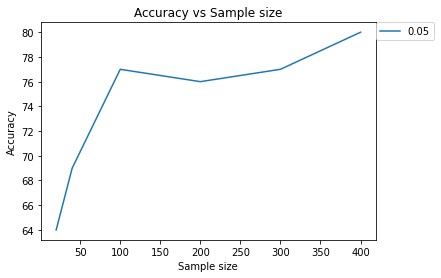

In [25]:
fig1, ax=plt.subplots()
for lr in lr_array:
    ac=[]
    s=[]
    for tr_size in tr_percent:
        size =  round(len(instances_tr)*tr_size/100)
        s.append(size)
        pre_instances = instances_tr[0:size]
        weights = train_perceptron(pre_instances, lr, 100)
        accuracy = get_accuracy(weights, instances_te)
        ac.append(accuracy)
ax.plot(s,ac,label=lr)
ax.legend(bbox_to_anchor=(1,1),loc='upper left', borderaxespad=0)
ax.set_xlabel("Sample size")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy vs Sample size")
fig1.show()